---
title: Downloading Population Data from WorldPop
short_title: Population Data
---

In this notebook we will use `dhis2eo` to download [yearly population count data from WorldPop](https://hub.worldpop.org/geodata/listing?id=135) for a given country. 

-------------
## What you need

Start by importing the libraries that we need:

In [1]:
import geopandas as gpd
import xarray as xr
from earthkit.plots import quickplot

from dhis2eo.data.worldpop import pop_total

In the case of WorldPop, data downloads are organized by country, so the only other information we need is the ISO3 code of the country you want to download data for. 

## Downloading WorldPop total population data

The `dhis2eo.data.worldpop.pop_total` module allows you do easily download yearly historical and projected population data for individual countries from the [WorldPop Global v2 dataset between 2015 and 2030](https://hub.worldpop.org/project/categories?id=3). 

#### Parameters

We set the `start` and `end` parameters to get the last 6 years of data. Unlike the other data sources supported by `dhis2eo`, WorldPop does not currently support downloading data by bounding box - instead, we need to set the ISO3 code (`country_code`) of the country we want to download data for. 

We also specify a `dirname` for where the data should be saved and a `prefix` for naming the downloaded files. 

In [16]:
start = "2020"
end = "2025"
country_code = 'SLE'
dirname = '../../data/local'
prefix = 'worldpop_yearly_sierra_leone'

#### Download the files

Running the download function will save the yearly files to the specified location, and return the list of files:

In [17]:
files = pop_total.yearly.download(start=start, end=end, country_code=country_code, 
                                  dirname=dirname, prefix=prefix)
files

INFO - 2026-01-13 14:59:21,054 - dhis2eo.data.worldpop.pop_total.yearly - Year 2020
INFO - 2026-01-13 14:59:21,057 - dhis2eo.data.worldpop.pop_total.yearly - File already downloaded: C:\Users\karimba\Documents\Github\climate-tools\docs\guides\data\local\worldpop_yearly_sierra_leone_2020.nc
INFO - 2026-01-13 14:59:21,058 - dhis2eo.data.worldpop.pop_total.yearly - Year 2021
INFO - 2026-01-13 14:59:21,061 - dhis2eo.data.worldpop.pop_total.yearly - File already downloaded: C:\Users\karimba\Documents\Github\climate-tools\docs\guides\data\local\worldpop_yearly_sierra_leone_2021.nc
INFO - 2026-01-13 14:59:21,062 - dhis2eo.data.worldpop.pop_total.yearly - Year 2022
INFO - 2026-01-13 14:59:21,066 - dhis2eo.data.worldpop.pop_total.yearly - File already downloaded: C:\Users\karimba\Documents\Github\climate-tools\docs\guides\data\local\worldpop_yearly_sierra_leone_2022.nc
INFO - 2026-01-13 14:59:21,068 - dhis2eo.data.worldpop.pop_total.yearly - Year 2023
INFO - 2026-01-13 14:59:21,072 - dhis2eo.da

[WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2020.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2021.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2022.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2023.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2024.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/worldpop_yearly_sierra_leone_2025.nc')]

The download function treats the files saved under the given `dirname` and `prefix` as a cache, so it can safely be rerun multiple times without re-downloading. To ignore the cache and fetch fresh data you can set `overwrite=True`.

#### Inspect the data

Let's open the list of downloaded files as an xarray dataset:

In [18]:
ds = xr.open_mfdataset(files)

C:\Users\karimba\AppData\Local\Temp\ipykernel_28568\1132370646.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds = xr.open_mfdataset(files)


We inspect the dataset and see that it contains yearly data for the specified period 2020 to 2025, and contains the data variable `pop_total` (Total population):

In [19]:
ds

<xarray.Dataset> Size: 645MB
Dimensions:      (time: 6, y: 3695, x: 3635)
Coordinates:
  * time         (time) datetime64[ns] 48B 2020-01-01 2021-01-01 ... 2025-01-01
  * x            (x) float64 29kB -13.3 -13.3 -13.3 ... -10.27 -10.27 -10.27
  * y            (y) float64 30kB 10.0 9.999 9.998 9.997 ... 6.923 6.922 6.921
Data variables:
    spatial_ref  (time) int64 48B 0 0 0 0 0 0
    pop_total    (time, y, x) float64 645MB dask.array<chunksize=(1, 3695, 3635), meta=np.ndarray>

Finally, let's visualize the most recent population distribution for 2025 using `earthkit.plots.quickplot`:

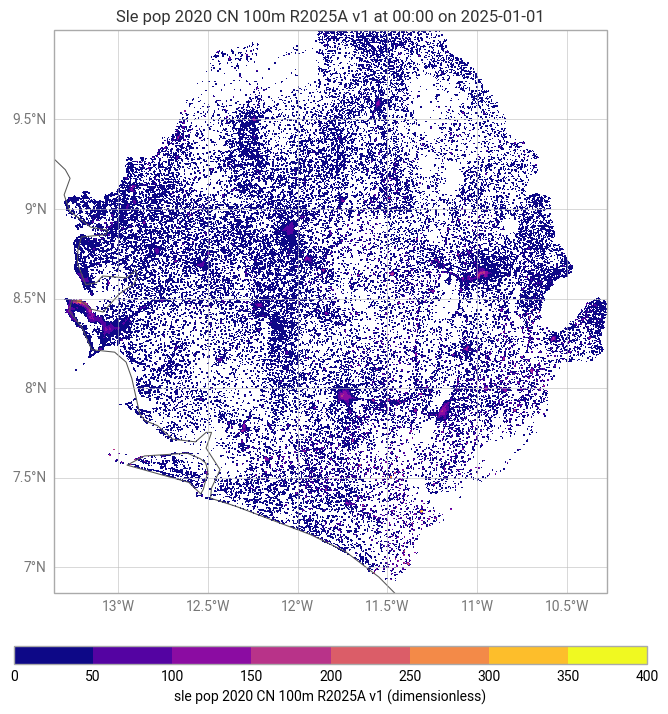

In [20]:
quickplot(ds.sel(time='2025'))

## Next steps

This notebook has showed how to download the WorldPop total population count data. For guidance on how to further process the downloaded data, see: 

* [Aggregate the data to your organisation units](../../aggregation/org-unit-aggregation.ipynb).
* [Import the aggregated data to DHIS2](../../import-data/using-python-client.ipynb).

As these are yearly data that includes future projections, the script likely only needs to be run once. 